In [288]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [290]:
#1 Шаг - проведен небольшой exploratory analysis, для поверзностного понимания как выглядят данные

In [292]:
#Загрузка данных о клиентах
df_users = pd.read_csv('olist_customers_dataset.csv')

customer_id — позаказный идентификатор пользователя
customer_unique_id — уникальный идентификатор пользователя (аналог номера паспорта)
customer_zip_code_prefix — почтовый индекс пользователя
customer_city — город доставки пользователя
customer_state — штат доставки пользователя

In [295]:
df_users.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [297]:
#Количество уникальных заказчиков, число штатов из которых происходили заказы
df_users['customer_unique_id'].nunique(), df_users['customer_state'].nunique()

(96096, 27)

<Axes: xlabel='customer_state', ylabel='population'>

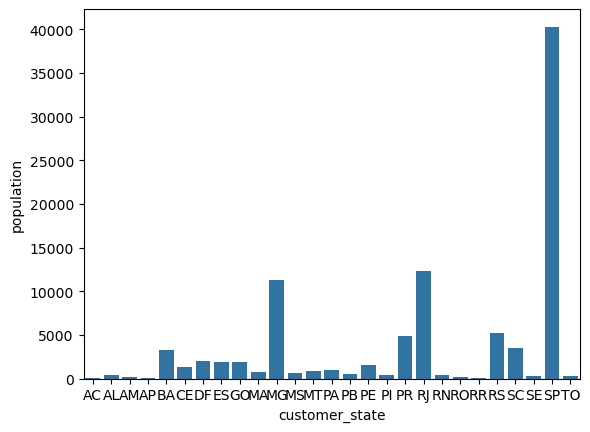

In [299]:
# Распределение клиентов по штатам
users_by_state = df_users.groupby('customer_state').agg(population=('customer_unique_id','nunique'))
sns.barplot(data=users_by_state, x='customer_state', y='population')

In [300]:
#Распределени пользователей по городам
users_by_city = df_users.groupby('customer_city').agg(population=('customer_unique_id','nunique'))
users_by_city.sort_values(by='population', ascending=False).head()

,population
customer_city,
sao paulo,14984
rio de janeiro,6620
belo horizonte,2672
brasilia,2069
curitiba,1465


order_id — уникальный идентификатор заказа (номер чека)
customer_id — позаказный идентификатор пользователя
order_status — статус заказа (created, approved, invoiced, processing, shipped, delivered, unavailable, canceled)
('delivered', 'invoiced', 'shipped', 'processing', 'unavailable', 'canceled', 'created', 'approved')
order_purchase_timestamp — время создания заказа
order_approved_at — время подтверждения оплаты заказа
order_delivered_carrier_date — время передачи заказа в логистическую службу
order_delivered_customer_date — время доставки заказа
order_estimated_delivery_date — обещанная дата доставки

In [304]:
#Загрузка данных о заказах и конвертация данных типа строка в дату
df_orders = pd.read_csv('olist_orders_dataset.csv')
df_orders['order_purchase_timestamp'] = pd.to_datetime(df_orders['order_purchase_timestamp'])
df_orders['order_approved_at'] = pd.to_datetime(df_orders['order_approved_at'])
df_orders['order_delivered_carrier_date'] = pd.to_datetime(df_orders['order_delivered_carrier_date'])
df_orders['order_delivered_customer_date'] = pd.to_datetime(df_orders['order_delivered_customer_date'])
df_orders['order_estimated_delivery_date'] = pd.to_datetime(df_orders['order_estimated_delivery_date'])

In [305]:
df_orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26


In [306]:
#Распределение заказов по их статусам (можем видеть, что большинство заказов, порядка 97%, прихоходят заказчикам и нигде не теряются)
#1.1% заказов потерялись по пути к заказчику (заказ был отгружен, но не получен)
#0.6% отмененных заказов
df_orders.groupby('order_status').agg(total_orders=('order_id','count')).sort_values('total_orders', ascending=False)

,total_orders
order_status,
delivered,96478
shipped,1107
canceled,625
unavailable,609
invoiced,314
processing,301
created,5
approved,2


In [310]:
#Проверка данных на "адекватность" (чтоб не было доисторического времени например)
df_orders.describe().T

,count,mean,min,25%,50%,75%,max
order_purchase_timestamp,99441,2017-12-31 08:43:12.776581120,2016-09-04 21:15:19,2017-09-12 14:46:19,2018-01-18 23:04:36,2018-05-04 15:42:16,2018-10-17 17:30:18
order_approved_at,99281,2017-12-31 18:35:24.098800128,2016-09-15 12:16:38,2017-09-12 23:24:16,2018-01-19 11:36:13,2018-05-04 20:35:10,2018-09-03 17:40:06
order_delivered_carrier_date,97658,2018-01-04 21:49:48.138278656,2016-10-08 10:34:01,2017-09-15 22:28:50.249999872,2018-01-24 16:10:58,2018-05-08 13:37:45,2018-09-11 19:48:28
order_delivered_customer_date,96476,2018-01-14 12:09:19.035542272,2016-10-11 13:46:32,2017-09-25 22:07:22.249999872,2018-02-02 19:28:10.500000,2018-05-15 22:48:52.249999872,2018-10-17 13:22:46
order_estimated_delivery_date,99441,2018-01-24 03:08:37.730111232,2016-09-30 00:00:00,2017-10-03 00:00:00,2018-02-15 00:00:00,2018-05-25 00:00:00,2018-11-12 00:00:00


order_id — уникальный идентификатор заказа (номер чека)
order_item_id — идентификатор товара внутри одного заказа
product_id — ид товара (аналог штрихкода)
seller_id — ид производителя товара
shipping_limit_date — максимальная дата доставки продавцом для передачи заказа партнеру по логистике
price — цена за единицу товара
freight_value — вес товара 

In [313]:
#Загрузка данных о составе заказов
df_items = pd.read_csv('olist_order_items_dataset.csv')
df_items['shipping_limit_date'] = pd.to_datetime(df_items['shipping_limit_date'])

In [314]:
df_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [317]:
# Проверка данных на "адекватность" (чтоб цена и вес не были отрицательными например)
df_items.describe().T

,count,mean,min,25%,50%,75%,max,std
order_item_id,112650.0,1.197834,1.0,1.0,1.0,1.0,21.0,0.705124
shipping_limit_date,112650,2018-01-07 15:36:52.192685312,2016-09-19 00:15:34,2017-09-20 20:57:27.500000,2018-01-26 13:59:35,2018-05-10 14:34:00.750000128,2020-04-09 22:35:08,NaN
price,112650.0,120.653739,0.85,39.9,74.99,134.9,6735.0,183.633928
freight_value,112650.0,19.99032,0.0,13.08,16.26,21.15,409.68,15.806405


<Axes: ylabel='Count'>

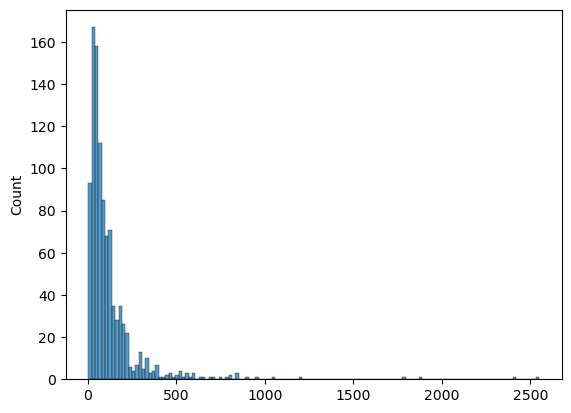

In [319]:
#
sample_price = np.random.choice(df_items['price'], size=1000)
sns.histplot(data=sample_price)

<Axes: ylabel='Count'>

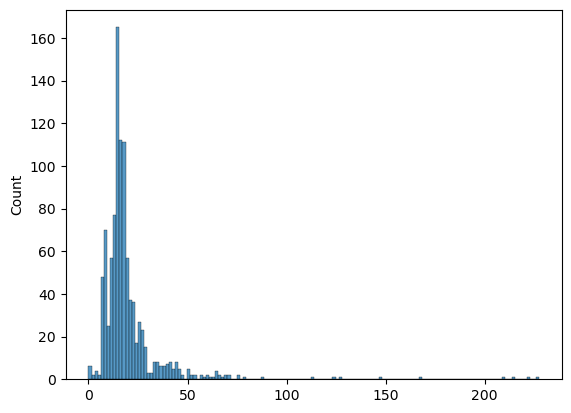

In [320]:
sample_freight = np.random.choice(df_items['freight_value'], size=1000)
sns.histplot(data=sample_freight)

In [322]:
#too_much_orders with only 1 item
#90% заказов состоит из одного товара
(df_items.groupby('order_id').agg(total_items=('product_id','count')).
 sort_values('total_items', ascending=False).
 groupby('total_items').agg(cnt=('total_items','count'))
)

,cnt
total_items,
1,88863
2,7516
3,1322
4,505
5,204
6,198
7,22
8,8
9,3


In [325]:
#2 Шаг - Оценка месячного retention в оформление заказа с помощью когортного анализа.
#Retention будет рассчитываться как Retention n_day (в нашем случае гранулярность в месяц, то есть можно назвать n_month Retention)

In [327]:
#Соединение таблиц
order_users = df_users.merge(df_orders, how='outer', on='customer_id')

In [330]:
#Проверка данных на неопределнные значения
order_users.isnull().sum()

customer_id                         0
customer_unique_id                  0
customer_zip_code_prefix            0
customer_city                       0
customer_state                      0
order_id                            0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [332]:
# Ввиду того, что в данных имеются неопределенные значения (которые отражают например, что заказ не дошел до заказчика), их не будем рассматривать
order_users_without_nan = order_users.dropna()
order_users_without_nan.head()


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,00012a2ce6f8dcda20d059ce98491703,248ffe10d632bebe4f7267f1f44844c9,6273,osasco,SP,5f79b5b0931d63f1a42989eb65b9da6e,delivered,2017-11-14 16:08:26,2017-11-14 16:35:32,2017-11-17 15:32:08,2017-11-28 15:41:30,2017-12-04
1,000161a058600d5901f007fab4c27140,b0015e09bb4b6e47c52844fab5fb6638,35550,itapecerica,MG,a44895d095d7e0702b6a162fa2dbeced,delivered,2017-07-16 09:40:32,2017-07-16 09:55:12,2017-07-19 19:09:37,2017-07-25 18:57:33,2017-08-04
2,0001fd6190edaaf884bcaf3d49edf079,94b11d37cd61cb2994a194d11f89682b,29830,nova venecia,ES,316a104623542e4d75189bb372bc5f8d,delivered,2017-02-28 11:06:43,2017-02-28 11:15:20,2017-03-01 15:24:20,2017-03-06 08:57:49,2017-03-22
3,0002414f95344307404f0ace7a26f1d5,4893ad4ea28b2c5b3ddf4e82e79db9e6,39664,mendonca,MG,5825ce2e88d5346438686b0bba99e5ee,delivered,2017-08-16 13:09:20,2017-08-17 03:10:27,2017-08-19 11:34:29,2017-09-13 20:06:02,2017-09-14
4,000379cdec625522490c315e70c7a9fb,0b83f73b19c2019e182fd552c048a22c,4841,sao paulo,SP,0ab7fb08086d4af9141453c91878ed7a,delivered,2018-04-02 13:42:17,2018-04-04 03:10:19,2018-04-04 18:11:09,2018-04-13 20:21:08,2018-04-18


In [334]:
#only neccessary columns
order_users_nec = order_users_without_nan[['customer_unique_id','order_purchase_timestamp']]

In [336]:
mo = order_users_nec.groupby('customer_unique_id').agg(first_occurence=('order_purchase_timestamp','min'))
order_users_nec = order_users_nec.merge(mo, how='inner', on='customer_unique_id')
order_users_nec['cohort_month'] = order_users_nec['first_occurence'].dt.to_period('M')
order_users_nec['return_day'] = order_users_nec['order_purchase_timestamp']-order_users_nec['first_occurence']
order_users_nec['return_month'] = order_users_nec['return_day'].apply(lambda x: int(str(x).split()[0])//30)

In [337]:
order_users_nec.isnull().sum()

customer_unique_id          0
order_purchase_timestamp    0
first_occurence             0
cohort_month                0
return_day                  0
return_month                0
dtype: int64

In [338]:
order_users_nec.sort_values('return_day', ascending=False).head(10)

,customer_unique_id,order_purchase_timestamp,first_occurence,cohort_month,return_day,return_month
45462,32ea3bdedab835c3aa6cb68ce66565ef,2018-06-28 11:46:04,2016-10-03 09:44:50,2016-10,633 days 02:01:14,21
22444,ccafc1c3f270410521c3c6f3b249870f,2018-06-07 19:03:12,2016-10-06 19:33:34,2016-10,608 days 23:29:38,20
32072,d8f3c4f441a9b59a29f977df16724f38,2018-08-24 17:52:59,2017-01-18 21:08:18,2017-01,582 days 20:44:41,19
40966,94e5ea5a8c1bf546db2739673060c43f,2018-05-09 13:49:19,2016-10-05 21:10:56,2016-10,580 days 16:38:23,19
41681,87b3f231705783eb2217e25851c0a45d,2018-05-04 11:14:37,2016-10-08 18:45:34,2016-10,572 days 16:29:03,19
67170,8f6ce2295bdbec03cd50e34b4bd7ba0a,2018-07-31 22:03:59,2017-02-09 12:48:59,2017-02,537 days 09:15:00,17
70851,4e23e1826902ec9f208e8cc61329b494,2018-03-13 22:28:21,2016-10-05 12:32:55,2016-10,524 days 09:55:26,17
42107,a1c61f8566347ec44ea37d22854634a1,2018-08-25 11:01:56,2017-03-19 08:36:36,2017-03,524 days 02:25:20,17
58840,a262442e3ab89611b44877c7aaf77468,2018-07-24 16:44:34,2017-02-17 18:27:58,2017-02,521 days 22:16:36,17
3178,18bc87094128bbfe943cf88adcf72059,2018-06-25 12:06:07,2017-01-26 23:48:56,2017-01,514 days 12:17:11,17


In [339]:
#Retention В целочисленном исчислении
cohort_retention = order_users_nec.groupby(['cohort_month','return_month'], as_index=False).agg(cnt=('customer_unique_id','nunique'))
cohort_retention = cohort_retention.pivot(index='cohort_month', columns='return_month', values='cnt')
cohort_retention

return_month,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,19,20,21
cohort_month,,,,,,,,,,,,,,,,,,,,,
2016-09,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-10,267.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,...,1.0,NaN,1.0,NaN,1.0,NaN,1.0,2.0,1.0,1.0
2016-12,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-01,715.0,2.0,NaN,4.0,1.0,1.0,2.0,2.0,NaN,NaN,...,4.0,3.0,2.0,NaN,2.0,2.0,2.0,1.0,NaN,NaN
2017-02,1616.0,2.0,3.0,6.0,4.0,2.0,4.0,1.0,1.0,5.0,...,6.0,1.0,3.0,2.0,1.0,1.0,3.0,NaN,NaN,NaN
2017-03,2503.0,7.0,13.0,11.0,3.0,2.0,9.0,4.0,7.0,6.0,...,4.0,4.0,3.0,7.0,2.0,3.0,2.0,NaN,NaN,NaN
2017-04,2256.0,8.0,6.0,1.0,6.0,8.0,6.0,10.0,6.0,5.0,...,3.0,NaN,2.0,2.0,2.0,2.0,NaN,NaN,NaN,NaN
2017-05,3450.0,15.0,13.0,8.0,13.0,11.0,11.0,4.0,10.0,9.0,...,11.0,6.0,3.0,7.0,4.0,NaN,NaN,NaN,NaN,NaN
2017-06,3037.0,13.0,16.0,10.0,6.0,15.0,9.0,6.0,4.0,10.0,...,8.0,3.0,9.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN


In [340]:
#Retention в долях
cohort_retention_percent = (cohort_retention.div(cohort_retention[0], axis=0)).fillna(0)
cohort_retention_percent

return_month,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,19,20,21
cohort_month,,,,,,,,,,,,,,,,,,,,,
2016-09,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2016-10,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.003745,0.000000,0.000000,0.003745,...,0.003745,0.000000,0.003745,0.000000,0.003745,0.000000,0.003745,0.007491,0.003745,0.003745
2016-12,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2017-01,1.0,0.002797,0.000000,0.005594,0.001399,0.001399,0.002797,0.002797,0.000000,0.000000,...,0.005594,0.004196,0.002797,0.000000,0.002797,0.002797,0.002797,0.001399,0.000000,0.000000
2017-02,1.0,0.001238,0.001856,0.003713,0.002475,0.001238,0.002475,0.000619,0.000619,0.003094,...,0.003713,0.000619,0.001856,0.001238,0.000619,0.000619,0.001856,0.000000,0.000000,0.000000
2017-03,1.0,0.002797,0.005194,0.004395,0.001199,0.000799,0.003596,0.001598,0.002797,0.002397,...,0.001598,0.001598,0.001199,0.002797,0.000799,0.001199,0.000799,0.000000,0.000000,0.000000
2017-04,1.0,0.003546,0.002660,0.000443,0.002660,0.003546,0.002660,0.004433,0.002660,0.002216,...,0.001330,0.000000,0.000887,0.000887,0.000887,0.000887,0.000000,0.000000,0.000000,0.000000
2017-05,1.0,0.004348,0.003768,0.002319,0.003768,0.003188,0.003188,0.001159,0.002899,0.002609,...,0.003188,0.001739,0.000870,0.002029,0.001159,0.000000,0.000000,0.000000,0.000000,0.000000
2017-06,1.0,0.004281,0.005268,0.003293,0.001976,0.004939,0.002963,0.001976,0.001317,0.003293,...,0.002634,0.000988,0.002963,0.001317,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


<Axes: title={'center': 'Retention rates'}, xlabel='return_month', ylabel='cohort_month'>

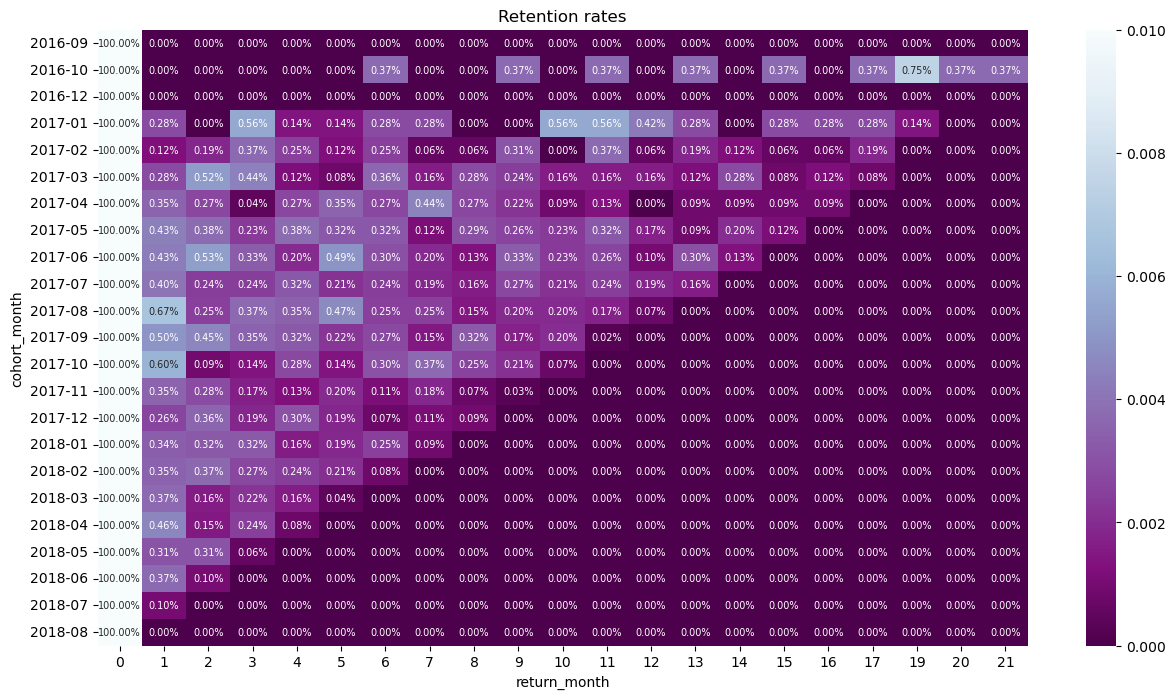

In [344]:
#Тепловая карта, где можно явно увидеть на сколько ужасный retention имеет маркетплейс, причем на протяжении всех двух лет
plt.figure(figsize=(15, 8))
plt.title('Retention rates')
sns.heatmap(data=cohort_retention_percent, annot = True, fmt = '.2%', vmin = 0.0, vmax = 0.01, cmap="BuPu_r", annot_kws={"size": 7})

In [347]:
#Медианный retention за первый месяц = 0.0035
cohort_retention_percent[1].median()

0.0034981714103991097

In [348]:
#Когорта с самым высоким retention на 3-й месяц - 2017-01
cohort_retention_percent[cohort_retention_percent[3] == cohort_retention_percent[3].max()].index[0]

Period('2017-01', 'M')

In [352]:
#3 Шаг - оценить существует ли product/market fit у маркетплейса.

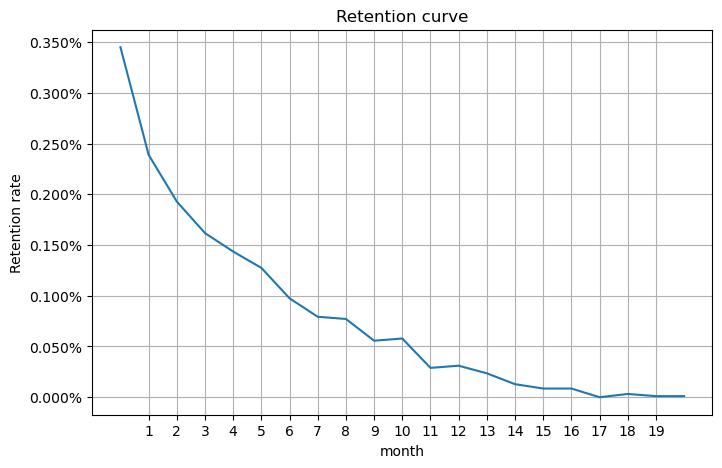

In [354]:
#Retention curve - показывает зависимоть коэффициента удержание от времени существования продукта
import matplotlib.ticker as mtick
mas = []
for i in range(0,22):
    if i!=18:
        mas.append(cohort_retention[i].fillna(0).sum()/cohort_retention[0].sum())
    else:
        mas.append(0)
mas = np.array(mas)

plt.figure(figsize=(8,5))
sns.lineplot(mas[1:])
plt.title('Retention curve')
plt.ylabel('Retention rate')
plt.xlabel('month')
plt.xticks(range(1,20))
plt.grid()
plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))

In [356]:
# Как видно из предыдушего графика retention продукта неумолимо падал с течением времени, пока не оказался у нижней планки, 
# равной практически 0. Это может говорить только об одном - PMF отсутствует у продукта.
# Продукт не закрывает какую-то потребность клиента (клиент пользуется продуктом только в начале, а после не возвращается)
# На данном этапе должен фокусироваться на добавлении добавочной ценности у продукта, чтобы делать взаимодействие пользователя с ним более эффективным
# Возможно в продукте имеются такие проблемы как: большое количество заказов не приходит вовремя -> клиенты разачаровываются в продукте,
# либо процесс оформления заказа или процесс оплаты заказы очень продолжителен и труден, что отталкивает клиента от следующего использования продуктом

# Чтобы детальней выяснить на чем же именно стоит ориентирвоаться - проведем анализ различных метрик, выдвенем ряд гипотез
# и приоритизировав их остановимся на наиболле значимой, которая должна исправить текущею ситуаци/ в продукте

In [358]:
#-------------------------------------------------------------------------------------------------------------------------------------------

In [360]:
#4 Шаг - Определить 5 основных метрик, на которых продакт может сконцентрироваться, чтобы максимизировать прибыль компании.

In [362]:
#Загрузим заново данные (на всякий случай - вдруг старые были чем-то перезаписаны)
df_users = pd.read_csv('olist_customers_dataset.csv')
df_orders = pd.read_csv('olist_orders_dataset.csv')
df_items = pd.read_csv('olist_order_items_dataset.csv')

In [363]:
#Convert to date
cols = df_orders.columns[3:]
df_orders[cols] = df_orders[cols].apply(pd.to_datetime)

In [364]:
#Универсалное отношение (данные, соединенноые из всех таблиц)
universal_table = df_users.merge(df_orders, how='inner', on='customer_id').merge(df_items, how='inner', on='order_id')

In [365]:
#Добавление столбца, отражающей только гол и месяц совершения заказа
universal_table['order_purchase_month'] = universal_table['order_purchase_timestamp'].dt.to_period('M').astype(str)
universal_table.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,order_purchase_month
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05,1,a9516a079e37a9c9c36b9b78b10169e8,7c67e1448b00f6e969d365cea6b010ab,2017-05-22 15:22:12,124.99,21.88,2017-05
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-01-18 20:58:32,289.00,46.48,2018-01
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13,1,bd07b66896d6f1494f5b86251848ced7,7c67e1448b00f6e969d365cea6b010ab,2018-06-05 16:19:10,139.94,17.79,2018-05
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10,1,a5647c44af977b148e0a3a4751a09e2e,7c67e1448b00f6e969d365cea6b010ab,2018-03-27 16:31:16,149.94,23.36,2018-03
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15,1,9391a573abe00141c56e38d84d7d5b3b,4a3ca9315b744ce9f8e9374361493884,2018-07-31 10:10:09,230.00,22.25,2018-07


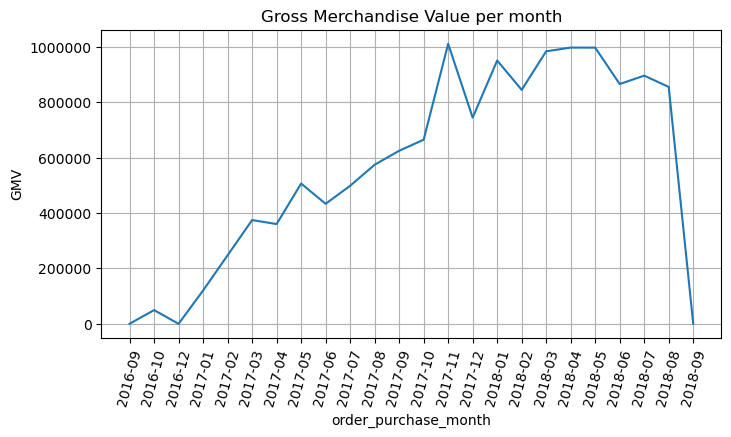

In [367]:
#1 metrics - Gross Merchandise Value =  the total sales value of the products or services sold through your marketplace 
#Первая метрика отражает рост объёма продаж маркетплейса.
GMV_df = universal_table.groupby('order_purchase_month', as_index=False).agg(GMV=('price','sum'))
GMV_df['order_purchase_month'] = GMV_df['order_purchase_month'].astype(str)

plt.figure(figsize=(8,4))
sns.lineplot(data=GMV_df, x='order_purchase_month', y='GMV')
plt.title('Gross Merchandise Value per month')
plt.xlabel('order_purchase_month')
plt.ylabel('GMV')
plt.xticks(rotation=75)
plt.ticklabel_format(axis="y", style='plain')
plt.grid()

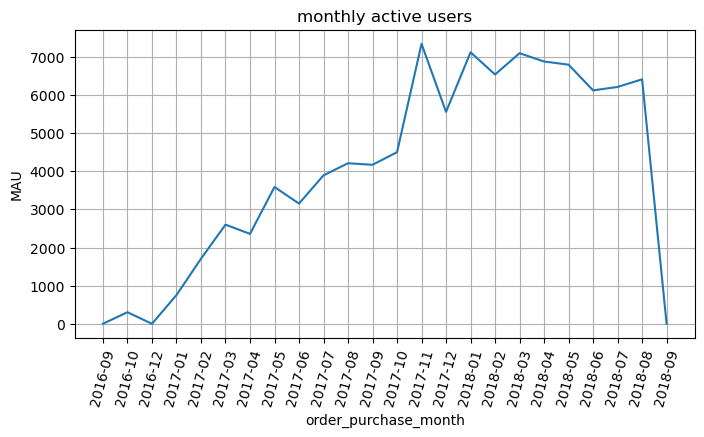

In [369]:
#2 metrics - MAU (monthly active users)
#Вторая — показывает объем аудитории, которой продукт доставляет ценность.
MAU_df = universal_table.groupby('order_purchase_month', as_index=False).agg(MAU=('customer_unique_id','nunique'))
MAU_df['order_purchase_month'] = MAU_df['order_purchase_month'].astype(str)

plt.figure(figsize=(8,4))
sns.lineplot(data=MAU_df, x='order_purchase_month', y='MAU')
plt.title('monthly active users')
plt.xlabel('order_purchase_month')
plt.ylabel('MAU')
plt.xticks(rotation=75)
plt.ticklabel_format(axis="y", style='plain')
plt.grid()

In [372]:
#3 metrics - конверсия в платящего (из заказа в оплату заказа)
# Третья — отражает заинтересованность новых клиентов в продакте.
mo1 = universal_table.groupby('order_purchase_month', as_index=False).agg(cnt_users=('customer_unique_id','nunique'))
mo2 = (universal_table.
       query('not order_approved_at.isnull()').
       groupby('order_purchase_month', as_index=False).
       agg(convert_users=('customer_unique_id','nunique'))
      )
conversion_df = mo1.merge(mo2, how='inner', on='order_purchase_month')
conversion_df['order_purchase_month'] = conversion_df['order_purchase_month'].astype(str)
conversion_df['conversion_rate'] = conversion_df['convert_users']/mo3['cnt_users']
conversion_df

,order_purchase_month,cnt_users,convert_users,conversion_rate
0,2016-09,3,3,1.000000
1,2016-10,305,305,1.000000
2,2016-12,1,1,1.000000
3,2017-01,755,753,0.997351
4,2017-02,1708,1696,0.992974
5,2017-03,2601,2601,1.000000
6,2017-04,2359,2359,1.000000
7,2017-05,3588,3588,1.000000
8,2017-06,3154,3154,1.000000
9,2017-07,3894,3894,1.000000


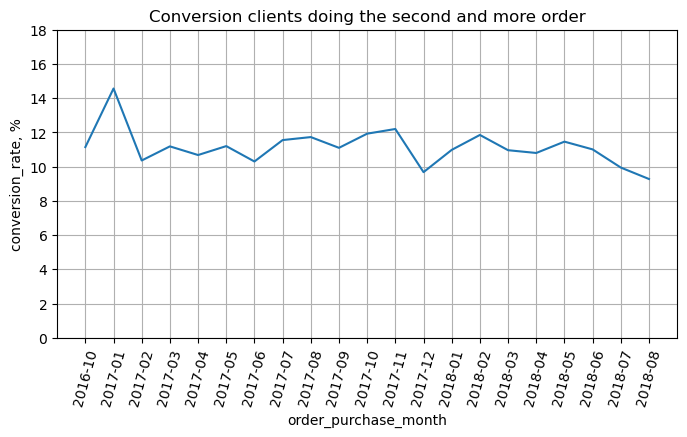

In [374]:
#4 metrics - Конверсия во второй и более заказы 
# Четвёртая — отражает вовлеченность клиента в продолжение использования продукта.
oders_more_than_2 = (universal_table.
                     groupby(['customer_unique_id','order_purchase_month'], as_index=False).
                     agg(number_of_orders=('order_id','count')).
                     query('number_of_orders>=2')
                    ).groupby('order_purchase_month', as_index=False).agg(cnt=('order_purchase_month','count'))
total_users_per_month = universal_table.groupby('order_purchase_month', as_index=False).agg(total_users=('customer_unique_id','nunique'))
conversion_df = oders_more_than_2.merge(total_users_per_month, how='inner', on='order_purchase_month')
conversion_df['order_purchase_month'] = conversion_df['order_purchase_month'].astype(str)
conversion_df['conversion_rate'] = conversion_df['cnt']/conversion_df['total_users']*100

plt.figure(figsize=(8,4))
sns.lineplot(data=conversion_df.iloc[1:,:], x='order_purchase_month', y='conversion_rate')
plt.title('Conversion clients doing the second and more order')
plt.xlabel('order_purchase_month')
plt.ylabel('conversion_rate, %')
plt.xticks(rotation=75)
plt.yticks(range(0,20,2))
plt.grid()

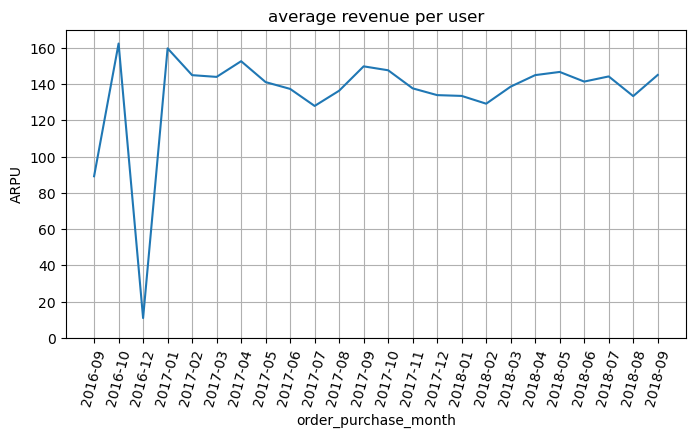

In [376]:
#5 metrics - ARPU (average revenue per user)
# Пятая — отражает денежное выражение вовлеченности клиента.
ARPU_df = (universal_table.
           query('not order_approved_at.isnull()').
           groupby('order_purchase_month', as_index=False).
           agg(total_revenue=('price','sum'), cnt_users=('customer_unique_id','nunique'))
          )
ARPU_df['order_purchase_month'] = ARPU_df['order_purchase_month'].astype(str)
ARPU_df['ARPU'] = ARPU_df['total_revenue']/ARPU_df['cnt_users']

plt.figure(figsize=(8,4))
sns.lineplot(data=ARPU_df, x='order_purchase_month', y='ARPU')
plt.title('average revenue per user')
plt.xlabel('order_purchase_month')
plt.ylabel('ARPU')
plt.xticks(rotation=75)
plt.yticks(range(0,170,20))
plt.grid()

Гипотеза 1. Если исправим баг в системе процессинга заказов, то клиентам не придётся сталкиваться с проблемой отмены заказа, вследствие чего количество доставленных заказов увеличится. Считаем, что мы таким образом избавимся от всех отмен.
Гипотеза 2. Если сократим время до отгрузки заказа, то клиенты перестанут получать свой заказ с запаздыванием, вследствие чего количество заказов увеличится за счёт повторных заказов. 
Гипотеза 3. Если создадим новый способ оплаты, который будет конвертировать клиентов в повторный заказ, то клиенты не будут испытывать трудности при оформлении заказа, вследствие чего количество заказов увеличится за счёт повторных заказов.

In [400]:
#5 Шаг - Выбрать одну из 3 основных гипотез с помощью фреймворка ICE
#Selection of hypothesis based on ICE framework
#Метрика с помощью которой оцениваем impact - количество заказов
#Conversion во второй заказ = 0.0035 (0.35% всех клиентов, сделавших заказ, сделают второй заказ)
conversion_to_the_second_order = 0.0035
users_order = (universal_table.
                        query('order_purchase_month > "2017-05"').
                        groupby('customer_unique_id').
                        agg(cnt_orders=('order_id','count'))
                       )
users_order_canceled = (universal_table.
                                 query('order_purchase_month > "2017-05" and order_status == "canceled"').
                                 groupby('customer_unique_id').
                                 agg(cnt_orders=('order_id','count'))
                                 )
users_order_delay = (universal_table.
                                 query('order_purchase_month > "2017-05" and order_delivered_customer_date > order_estimated_delivery_date').
                                 groupby('customer_unique_id').
                                 agg(cnt_orders=('order_id','count'))
                                )
#Изменив баг - 0.0035 клиентов с отмененными заказами совершат второй заказ
impact_1 = users_order_canceled['cnt_orders'].sum()*0.0035
#Изменив дату отгрузки, таким образом чтобы заказы перестали призодить с опозданием
impact_2 = users_order_delay['cnt_orders'].sum()*0.0035
#При изменении способа оплаты, 0.0035  клиентов, совершившие один заказ, совершат второй 
impact_3 = users_order['cnt_orders'].sum()*0.0035

#Функция для перевода метрики в шкалу
def f(x):
    for i,j in Impact_dic.items():
        if j[0]<=x<=j[1]:
            return i
#Соответсвтие метрики и балла Impact
Impact_dic = {
    1:[0, 50],
    2:[51, 150],
    3:[151, 350],
    4:[351, 750],
    5:[751, 1550],
    6:[1551, 3150],
    7:[3151, 6350],
    8:[6351, 12750],
    9:[12751, 25550],
    10:[25551, 51150]
}
#Рассчитывая ICE для каждой гипотезы, получаем:
df_ICE = pd.DataFrame({'Impact':[f(impact_1), f(impact_2), f(impact_3)], 'Confidence':[8, 10, 5], 'Ease':[6, 4, 9]}) 
df_ICE['ICE'] = df_ICE['Impact']*df_ICE['Confidence']*df_ICE['Ease']
df_ICE.index = ['Hypothesis 1', 'Hypothesis 2', 'Hypothesis 3']
#Итоговая таблица ICE для трех гипотез, Hypothesis 3 имеет больщий ICE - поэтому на ней нужно концентрировать первостепенное внимание 
df_ICE

,Impact,Confidence,Ease,ICE
Hypothesis 1,1,8,6,48
Hypothesis 2,1,10,4,40
Hypothesis 3,3,5,9,135


In [398]:
users_with_one_order.query('cnt_orders == 5')
74156/84496, 7816/84496, 1489/84496, 528/84496, 228/84496

(0.877627343306192,
 0.09250142018557092,
 0.017622135959098655,
 0.006248816512024238,
 0.002698352584737739)

In [406]:
#6 Шаг - Сформулировать нужные метрики, на которые выбранная гипотеза должна повлиять.
# Теперь осталось понять на какие метрики будет скорее всего влиять сформулированная гипотеза.
# Ведь именно они будут участвовать в дальнейшем проведении экспериментов.
# Метрики разобьем на три группы для лучшего анализа дальнейших результатов:
# 1) Целевые метрики - Gross Merchandise Value, Количество сделанных заказов
# 2) Прокси метрики - конверсия во второй заказ, retention rate, среднее число заказов на пользователя
# 3) "Защитные метрики" - доля отмененных заказов
# Где целевая метрика необходима для анализа долгосрочных результатов,
# Прокси-метрика является наиболее чувствительной по отношению к целевой метрик (значимве изменения можем увидеть за более короткий срок)
# Защитная метрика необзодима для анализом метрик на которые не наппрвлено изменение, но которые сигнализировать о проблемах
# (в данном случае, если при выкате в прод изменений доля отмененных заказов будет увеличиваться, прийдется исследовать из-за каких 
# факторов это произошло)

In [ ]:
#7 Шаг - Выводы о проделанной работе
# Недавно появившийся на рынке маркетплейс по продаже товаров из Бразилии столкнулся с проблемой - выручка находится на плато 
# Задача: сделать так, чтобы метрики стали рости
# Основной анализ состоял из 6 шагов:
# 1) На первом шаге были построен когортный анализ (гранулярность месячная, 
# так как делаем предположени, что клиенты делают такие заказы не каждую неделю и особенно не каждый день)
# Анализ показал непримеримо низкий retention на протяжении всей жизни продукта, простыми словами клиенты не задерживаются в данным маркетплейсе
# Из 10000 клиентов в среднем только 30 будут возвращаться в продукт
# Хотя в начале жизни продукта и был рост таких метрик как Gross Merchandise Value, Количество сделанных заказов, 
# но это по большему счету из-за притока новых клиентов в продукт. Но никак не из-за возвращения старых пользователй.
# 2) Когортный анализ позволил нам сделать вывод, что Product/market fit отсутствует у маркетплейса,
# то есть продукт закрывает не все  потребности клиента, из-за чего он и не возвращается
# 3) Для дальнейшего анализа пришлось расчитать основные метрики продукта, которые довольно четко описывают его сотояние.
# Из них были получены insights: общая выручка за все время существования продукта росла вверх, как и общее кол-во пользователей,
# Конверсия из создания в оплату была практически 1 во все месяца, то есть проблем на данном этапе у клиента не наблюдалось.
# Средний чек на заказчика был почти за все время на одном и том же уровне (клиенты не имеют тенденцию делать дорогие заказы с течением времени)
# И последняя метрика, на которую стоит обратить пристальное внимание, конверсия пользователей в следующие заказы (в среднем 16 из 100 пользователей вохвращаются, чтобы сделать второй заказ)
# данный показатель очень мал и именно на ней делаем акцент в последующем пункте
# 4) С помощью фреймворка ICE приоритизировали гипотезы и выбрали наиболее подходящую в текущиз реалиях 
# а именно, что если создать другой способ оплаты, конверсия в повторные заказы будет увеличена
# 5) На последнем этапе осталось выбрать метрик, которые бы описывали поведение продукта как можно обширнее во время эксперимента
# выбранные метрики: Gross Merchandise Value, конверсия во второй заказ, доля отмененных заказов
#  
# Таким образом в провеленном анализе были найдены точки возможного роста продукта, была выделена основная проблема, с которой столкнулся продукт
# Были исследованиы несколько основных метрик, была выбрана гипотеза решения и метрика, по которой в дальнейших этапах будет оцениваться (a/b тест)
# 
# Рекомендации: в дальнейшем больше внимания уделять не только метрикам роста, но и метрикам продукта (особенно Retentioin)
# Так как если в начале бы был рассмотрена Retentioin, то уже на ранних этапах жизни продукта, можно было зарегистрировать проблему в продукте
# и как следстиве раньше начать искать и решать проблему, что привело бы к большей выручке)

